In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from keras.layers import *
from keras.models import *
from keras.utils import *
from sklearn.preprocessing import *
import seaborn as sns
pd.options.display.max_columns = 5

Using TensorFlow backend.


In [2]:
names = ['sl', 'sw', 'pl', 'pw', 'class']
df = pd.read_csv('./data/iris.data', names=names, index_col=False)

In [3]:
df.head()

,sl,sw,pl,pw,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.shape

(150, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sl      150 non-null    float64
 1   sw      150 non-null    float64
 2   pl      150 non-null    float64
 3   pw      150 non-null    float64
 4   class   150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
# one-hot encoding on class
Y = LabelEncoder().fit_transform(df['class'])
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [7]:
Y = to_categorical(Y)
Y

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

In [8]:
X = df.drop('class', axis=1)
X.head()

,sl,sw,pl,pw
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [9]:
# set training data and test data
X_train = X[:-5]
X_test = X[-5:]

Y_train = Y[:-5]
Y_test = Y[-5:]

In [10]:
model = Sequential()
model.add(Dense(256, input_shape=(4,), activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(3, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               1280      
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_3 (Dense)              (None, 32)                4128      
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 99        
Total params: 38,403
Trainable params: 38,403
Non-trainable params: 0
_________________________________________________________________


In [11]:
# define optimizer and Error Function
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [12]:
hist = model.fit(X_train, Y_train, epochs=60, validation_split=0.1)

Train on 130 samples, validate on 15 samples
Epoch 1/60
130/130 [==============================] - 4s 30ms/step - loss: 1.0339 - acc: 0.5000 - val_loss: 1.2491 - val_acc: 0.0000e+00
Epoch 2/60
130/130 [==============================] - 0s 562us/step - loss: 0.7700 - acc: 0.7692 - val_loss: 1.2828 - val_acc: 0.0000e+00
Epoch 3/60
130/130 [==============================] - 0s 503us/step - loss: 0.6297 - acc: 0.7692 - val_loss: 0.8684 - val_acc: 0.0000e+00
Epoch 4/60
130/130 [==============================] - 0s 693us/step - loss: 0.5354 - acc: 0.8462 - val_loss: 0.5712 - val_acc: 1.0000
Epoch 5/60
130/130 [==============================] - 0s 804us/step - loss: 0.4682 - acc: 0.9385 - val_loss: 0.8259 - val_acc: 0.0000e+00
Epoch 6/60
130/130 [==============================] - 0s 768us/step - loss: 0.4178 - acc: 0.7846 - val_loss: 1.0402 - val_acc: 0.0000e+00
Epoch 7/60
130/130 [==============================] - 0s 583us/step - loss: 0.3842 - acc: 0.7692 - val_loss: 0.7841 - val_acc: 0.200

Text(0.5, 1.0, 'acc')

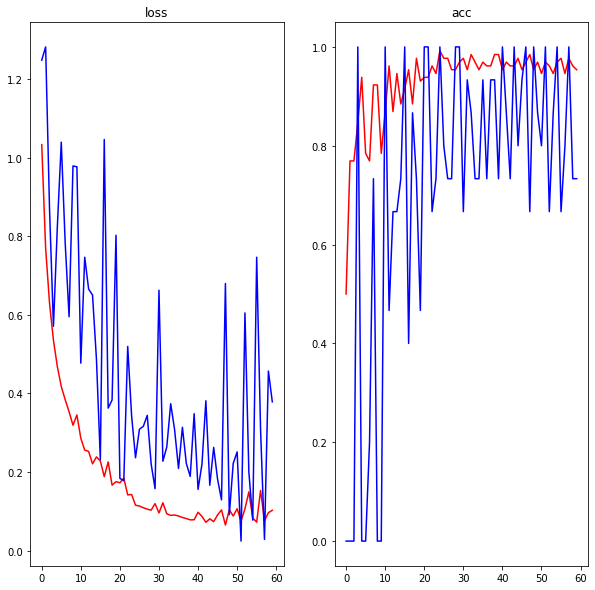

In [13]:
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.plot(hist.history['loss'], color='r')
plt.plot(hist.history['val_loss'], color='b')
plt.title('loss')

plt.subplot(1,2,2)
plt.plot(hist.history['acc'], color='r')
plt.plot(hist.history['val_acc'], color='b')
plt.title('acc')

In [14]:
# evaluation
score = model.evaluate(X_test, Y_test)

print(score)

5/5 [==============================] - 0s 1ms/step
[0.16701674461364746, 1.0]


In [15]:
# prediction
pred = model.predict(X_test)
print(pred)
print(Y_test)

[[2.1187867e-05 1.3452679e-01 8.6545199e-01]
 [3.5383542e-05 1.2942192e-01 8.7054271e-01]
 [4.9095634e-05 2.9428113e-01 7.0566976e-01]
 [7.0593533e-06 2.8945019e-02 9.7104788e-01]
 [4.5475132e-05 1.5961942e-01 8.4033507e-01]]
[[0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]
